In [ ]:
conda update -n base conda

In [ ]:
conda update --all

In [ ]:
pip install tensorflow

In [ ]:
conda install tensorflow

In [ ]:
pip install keras

In [2]:
import tensorflow

In [3]:
import keras

In [4]:
from keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
type(X_train)

numpy.ndarray

In [7]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
X_train.shape
# 60000개의 이미지
# 사이즈 28*28

(60000, 28, 28)

## 이미지 visualization

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
first_letter = X_train[1]

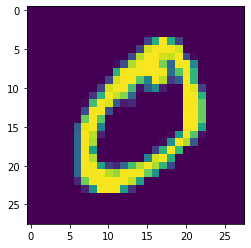

In [11]:
plt.imshow(first_letter)

In [12]:
y_train[1]

0

In [13]:
y_train.shape

(60000,)

## Pre-processing
- x: 60000*28*28 -> 60000*784
- y: multiclass -> binary class (5 -> 1, 5x -> 0)

In [14]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [15]:
X_train.shape

(60000, 784)

In [16]:
X_test.shape

(10000, 784)

In [17]:
y_train_5 = (y_train == 5) # y_train가 5이면 T 아니면 F
y_test_5 = (y_test ==5) # y_test가 5이면 T 아니면 F

In [18]:
y_train_5[1]

False

## Classification
- (X_train, y_train_5)학습
- (X_test) -> 예측

In [19]:
from sklearn.linear_model import SGDClassifier

In [20]:
sgd_clf = SGDClassifier()

In [21]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier()

In [22]:
y_test[1] # test 데이터 셋의 첫번째 레이블이 2이므로 5가 아님

2

In [23]:
sgd_clf.predict([X_test[1,]]) # 5이면 T, 아니면  F / 예측 값은 False (5가 아님)

array([False])

In [24]:
sgd_clf.predict(X_test)

array([False, False, False, ..., False,  True, False])

## Imbalanced classification

5- cross validation SGD linear model 의 정확도(accuracy) 평가

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring='accuracy')

array([0.95725   , 0.96733333, 0.9635    , 0.94366667, 0.96641667])

In [27]:
from sklearn.base import BaseEstimator

In [28]:
import numpy as np

In [29]:
# fit 없이 무조건 0으로 prediction
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [30]:
never_5_clf = Never5Classifier()

In [31]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=5, scoring='accuracy')

array([0.91266667, 0.90866667, 0.9095    , 0.90883333, 0.90858333])

### Note: class size 불균형이 심할 때는 classification accuracy 외에도 recall, precision, f1-score들을 참조해야한다.

## Confusion matrix

In [32]:
from sklearn.model_selection import cross_val_predict

In [33]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=5)

In [34]:
## prediction -> confusion matrix
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_train_5, y_train_pred)

array([[53335,  1244],
       [ 1040,  4381]], dtype=int64)

In [36]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [37]:
recall_score(y_train_5,y_train_pred)

0.8081534772182254

In [39]:
precision_score(y_train_5,y_train_pred)

0.7788444444444445

In [41]:
f1_score(y_train_5, y_train_pred)

0.7932283179431467

In [42]:
y_test[9997]

4

In [43]:
y_scores = sgd_clf.decision_function([X_test[9997,]])

In [44]:
y_scores

array([-7526.95190243])

In [45]:
threshold = 0
y_pred = (y_scores>threshold)

In [46]:
y_pred

array([False])

In [47]:
## threshold 커지면 음성, 작아지면 양성

In [48]:
from sklearn.model_selection import cross_val_score, cross_val_predict
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5, method='decision_function')

In [49]:
y_scores

array([  5088.54589935, -22451.1880947 , -30756.92812347, ...,
         2948.59957133, -10357.52759773, -14502.44416696])

In [50]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

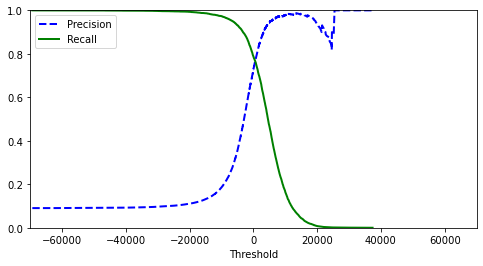

In [51]:
def plot_precison_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0,1])

plt.figure(figsize = (8,4))
plot_precison_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-70000,70000])
plt.show()

In [52]:
## recall과 precision이 서로 상충관계에 있다.
## 적절한 임계값은 그때그때 다르다.

## ROC 곡선

In [53]:
from sklearn.metrics import roc_curve

In [54]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [55]:
fpr # false positive rate

array([0.        , 0.        , 0.        , ..., 0.99730666, 0.99730666,
       1.        ])

In [56]:
tpr # trie positive rate

array([0.00000000e+00, 1.84467810e-04, 1.47574248e-03, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

In [57]:
thresholds

array([  37378.44537432,   37377.44537432,   25438.57153015, ...,
        -69044.5567101 ,  -69334.08999926, -130844.81739405])

In [58]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,linewidth=2)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

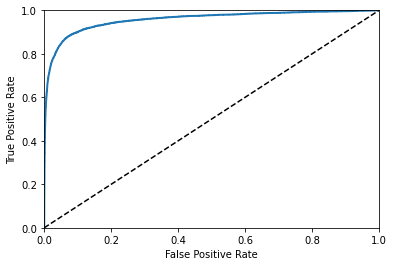

In [59]:
plot_roc_curve(fpr,tpr)

In [60]:
from sklearn.metrics import roc_auc_score

In [61]:
roc_auc_score(y_train_5,y_scores)

0.9570962360884328

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
forest_clf = RandomForestClassifier(random_state=42)

In [64]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=5,method='predict_proba')

In [65]:
y_probas_forest # 0번째 칼럼 -> 5가 아닐 확률, 1번째 칼럼 -> 5일 확률

array([[0.14, 0.86],
       [0.99, 0.01],
       [0.98, 0.02],
       ...,
       [0.01, 0.99],
       [0.96, 0.04],
       [0.96, 0.04]])

In [68]:
y_scores_forest = y_probas_forest[:,1] # 1번째 칼럼을 score로 쓴다.

In [69]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

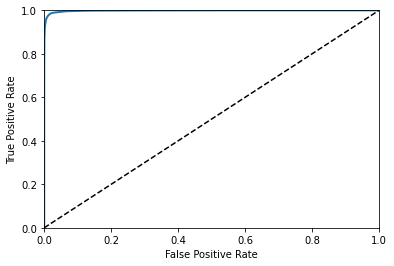

In [70]:
plot_roc_curve(fpr_forest,tpr_forest)

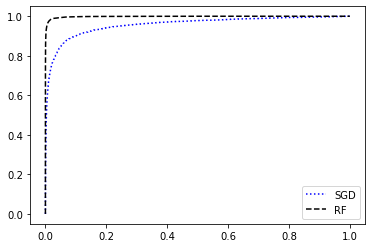

In [72]:
plt.plot(fpr,tpr,'b:',label='SGD') # SGD ROC
plt.plot(fpr_forest,tpr_forest,'k--',label='RF') # RF ROC
plt.legend(loc='lower right')

In [73]:
roc_auc_score(y_train_5,y_scores_forest)

0.998402186461512